# Major Project 2023

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_csv = pd.read_csv("drive/My Drive/Data/dataset/labels.csv")
print(labels_csv[0:10])
print(labels_csv.describe())
print(labels_csv.head())

                                 id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcec

<Axes: >

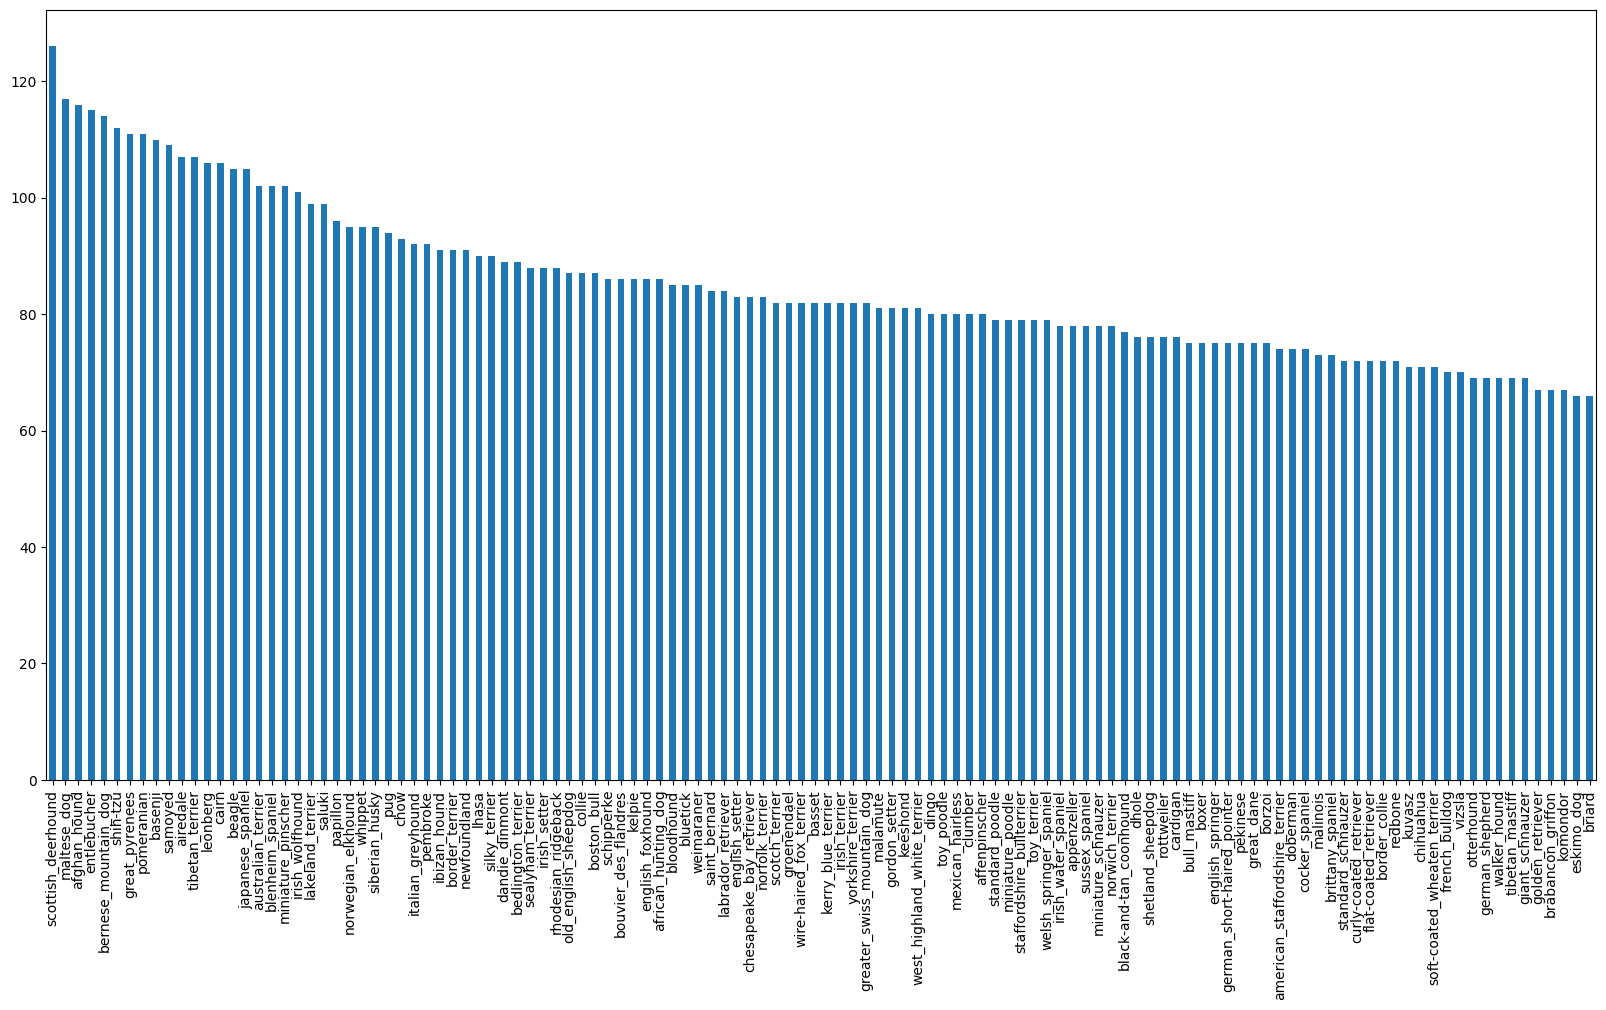

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
filenames = ["drive/MyDrive/Data/dataset/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['drive/MyDrive/Data/dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data/dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data/dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data/dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data/dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data/dataset/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data/dataset/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Data/dataset/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Data/dataset/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Data/dataset/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

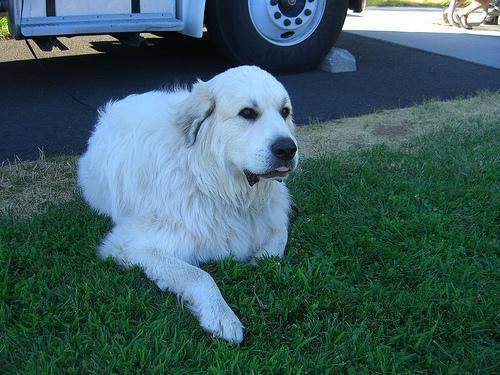

In [ ]:
from IPython.display import display, Image

Image(filenames[3001])

In [ ]:
labels = labels_csv["breed"].to_numpy()
print(labels[:20])
print(len(labels))

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'bedlington_terrier' 'borzoi' 'basenji'
 'scottish_deerhound' 'shetland_sheepdog' 'walker_hound' 'maltese_dog'
 'bluetick' 'norfolk_terrier' 'african_hunting_dog'
 'wire-haired_fox_terrier' 'redbone' 'lakeland_terrier' 'boxer']
10222


In [ ]:
len(filenames)

10222

In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
len(boolean_labels)

10222

In [ ]:
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
X = filenames
y = boolean_labels

print(X[:1])
print(y[:1])

['drive/MyDrive/Data/dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, F

In [ ]:
NUM_IMAGES = 10000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

10000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(8000, 8000, 2000, 2000)

In [ ]:
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=108)

In [ ]:
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=109)

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [ ]:
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, test_data=False):

  if test_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))

    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train[0:6400], y_train[0:6400])
val_data = create_data_batches(X_train[:1600], y_train[:1600], test_data=True)
test_data = create_data_batches(X_test, y_test, test_data=True)

Creating training data batches...
Creating validation data batches...
Creating validation data batches...


In [ ]:
r_train_data = create_data_batches(r_X_train[0:6400], r_y_train[0:6400])
r_val_data = create_data_batches(r_X_train[:1600], r_y_train[:1600], test_data=True)
r_test_data = create_data_batches(r_X_test, r_y_test, test_data=True)

Creating training data batches...
Creating validation data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

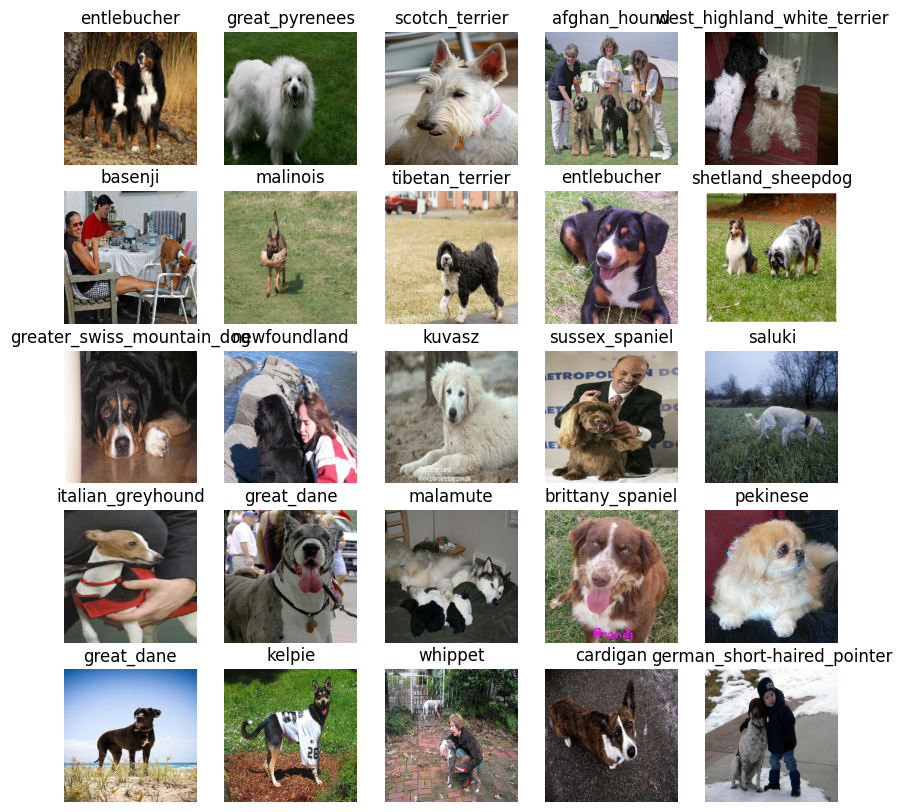

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

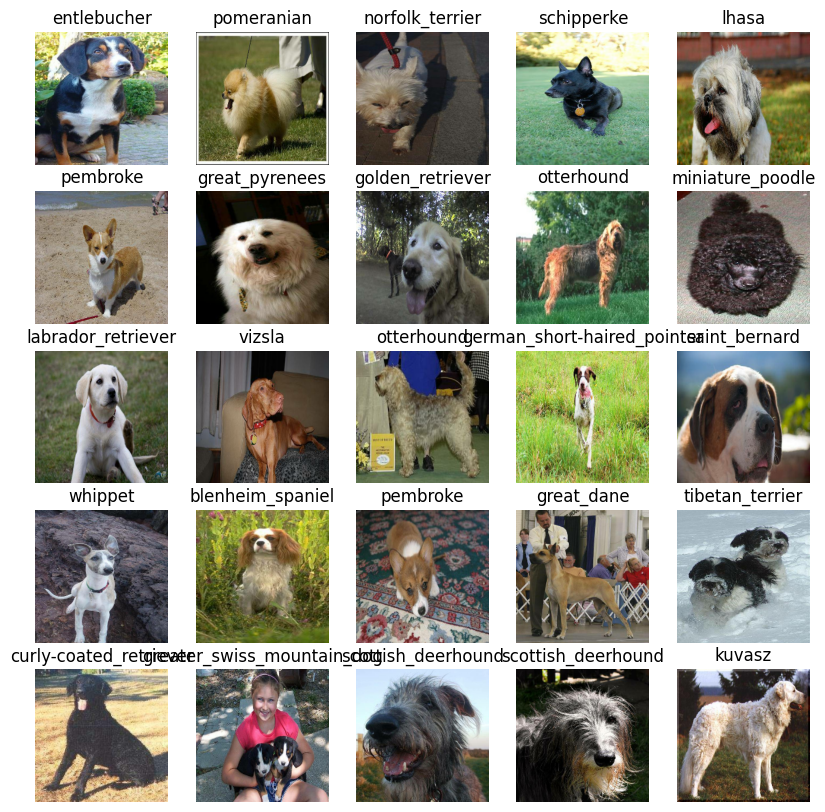

In [ ]:
test_images, test_labels = next(test_data.as_numpy_iterator())
show_25_images(test_images, test_labels)

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/tensorflow/resnet_50/classification/1"

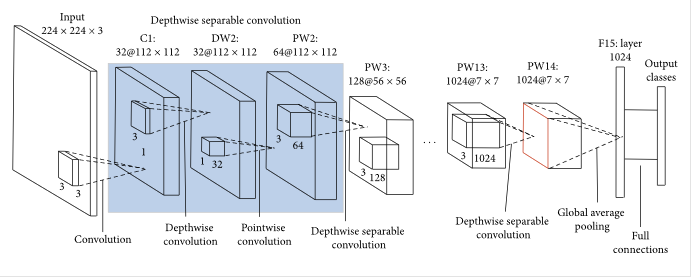

In [ ]:
mob = 'drive/MyDrive/mobilenetV2.png'
Image(mob)

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL, fine_tune=False):
  print("Building model with:", model_url)

  model = tf.keras.Sequential([
    hub.KerasLayer(model_url, trainable=fine_tune),
    tf.keras.layers.Dense(units=output_shape,
                          activation="softmax")
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
  )

  model.build(input_shape)

  return model

In [ ]:
def create_model_v2(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL, fine_tune=False):

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

  model = Sequential()

  model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(120, activation='softmax'))

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
  )

  model.build(input_shape)

  return model

In [ ]:
import tensorflow as tf

def create_model_v3(input_shape=(224, 224, 3), num_classes=120):
    # MobileNetV2-ResNet50 hybrid model with skip connections
    model = tf.keras.Sequential()

    # Depthwise separable convolution block
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    # First skip connection
    x1 = model.output

    # Depthwise separable convolution block
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    # Second skip connection
    x2 = model.output

    # Depthwise separable convolution block
    model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    # Third skip connection
    x3 = model.output

    # ResNet50 block
    base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model.add(base_model)

    # Global average pooling
    model.add(tf.keras.layers.GlobalAveragePooling2D())

    # Concatenate with skip connections
    x = model.output
    x = tf.keras.layers.Concatenate()([x, x3])
    x = tf.keras.layers.Concatenate()([x, x2])
    x = tf.keras.layers.Concatenate()([x, x1])

    # Dense output layer
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=model.input, outputs=x)

    # Set loss function and optimizer
    loss_func = tf.keras.losses.CategoricalCrossentropy()
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

    return model


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define the model architecture
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(120, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 222, 222, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      2112      
                                                        

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

# Define the model architecture
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, (1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(120, activation='softmax')
])

# Adding skip connections
skip_layer = 4
x = model.layers[skip_layer-1].output
for i in range(skip_layer, len(model.layers)):
    layer = model.layers[i]
    if 'Conv2D' in str(layer):
        x = layers.Conv2D(layer.filters, (1,1), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        layer_output = layers.add([layer.output, x])
        layer_output = layers.Activation('relu')(layer_output)
        x = layer_output

model = Model(inputs=model.input, outputs=layer_output)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


TypeError: ignored

In [ ]:
model = create_model_v3()
model.summary()

94765736/94765736 [==============================] - 3s 0us/step


ValueError: ignored

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 18 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
def train_model(mdl, t_data, v_data):
  """
  Trains a given model and returns the trained version.
  """

  tensorboard = create_tensorboard_callback()

  mdl.fit(x=t_data,
            epochs=NUM_EPOCHS,
            validation_data=v_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
r_new_model = create_model(fine_tune=True, model_url='https://tfhub.dev/tensorflow/resnet_50/classification/1')

Building model with: https://tfhub.dev/tensorflow/resnet_50/classification/1


In [ ]:
r_new_model = train_model(r_new_model, train_data, val_data)

NameError: ignored

In [ ]:
predictions = resnet_50_model.predict(test_data, verbose=1)
predictions

63/63 [==============================] - 167s 3s/step


array([[7.29362171e-08, 1.57557913e-08, 7.87249155e-11, ...,
        4.08206108e-11, 5.56213875e-09, 2.10969748e-08],
       [8.76437116e-06, 2.26770084e-07, 4.50281981e-08, ...,
        1.47093454e-06, 8.88943396e-06, 1.78609673e-06],
       [6.48418863e-05, 1.05177715e-08, 9.90476465e-08, ...,
        5.91210352e-08, 1.56110968e-06, 2.75525181e-05],
       ...,
       [4.69030738e-07, 3.36977890e-10, 2.14887041e-09, ...,
        4.82109422e-11, 2.18894597e-10, 9.59754398e-05],
       [8.29791291e-10, 1.83693611e-08, 1.93315884e-11, ...,
        8.91085539e-10, 1.07079609e-10, 7.85858378e-10],
       [2.43224640e-05, 1.44202109e-10, 2.51734946e-07, ...,
        4.57627465e-08, 4.58276918e-06, 9.26854739e-07]], dtype=float32)

In [ ]:
predictions = mobile_net_v2_final.predict(test_data, verbose=1)
predictions

63/63 [==============================] - 212s 3s/step


array([[1.15501395e-08, 8.96552971e-11, 2.58261190e-09, ...,
        5.26701083e-09, 2.06323463e-07, 1.83654314e-10],
       [1.35734211e-07, 9.08585829e-09, 2.50418464e-10, ...,
        3.60020312e-11, 2.58477045e-10, 1.36633913e-08],
       [5.37388725e-04, 3.60269150e-05, 4.10025823e-05, ...,
        1.26815885e-05, 2.77239771e-04, 5.76417986e-03],
       ...,
       [2.15142572e-04, 5.35932486e-06, 2.38804603e-07, ...,
        1.16922874e-05, 2.43801624e-05, 6.45496417e-03],
       [2.89527300e-08, 5.10193798e-09, 1.61868186e-09, ...,
        2.09574694e-07, 2.82054127e-04, 1.39316310e-08],
       [2.15773994e-08, 2.29921570e-05, 6.02744965e-10, ...,
        3.95200317e-09, 4.18944182e-07, 6.83278449e-06]], dtype=float32)

In [ ]:
predictions.shape

(2000, 120)

In [ ]:
mobile_net_v2_final.evaluate(test_data)

63/63 [==============================] - 10s 143ms/step - loss: 0.6887 - accuracy: 0.8075 - precision_3: 0.8453 - recall_3: 0.7870


[0.6887439489364624, 0.8075000047683716, 0.845327615737915, 0.7870000004768372]

In [ ]:
predictions.shape

(2000, 120)

In [ ]:
y_pred = tf.argmax(predictions, axis=1)
y_true = tf.squeeze(tf.slice(tf.where(y_test), [0,1], [2000,1]))

print(tf.reduce_max(y_pred))

tf.Tensor(119, shape=(), dtype=int64)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        15
           3       1.00      0.97      0.98        30
           4       0.94      0.94      0.94        17
           5       0.93      0.87      0.90        15
           6       0.88      1.00      0.94        23
           7       1.00      1.00      1.00        16
           8       1.00      0.94      0.97        17
           9       0.97      0.97      0.97        29
          10       1.00      0.95      0.97        19
          11       0.88      0.96      0.92        23
          12       1.00      1.00      1.00        11
          13       0.94      1.00      0.97        16
          14       1.00      1.00      1.00        16
          15       0.93      0.93      0.93        14
          16       1.00      1.00      1.00        12
          17       1.00    

In [ ]:
new_model = create_model(model_url='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5')

Building model with: https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5


In [ ]:
new_model = train_model(model, train_data, val_data)

Epoch 1/18
200/200 [==============================] - 234s 1s/step - loss: 4.7780 - accuracy: 0.0192 - val_loss: 5.3114 - val_accuracy: 0.0050
Epoch 2/18


In [ ]:
save_model(new_model, model_name="resnet_50_final")

Saving model to: drive/My Drive/Data/models/resnet_50_final.h5...


'drive/My Drive/Data/models/resnet_50_final.h5'

In [ ]:
predictions = new_model.predict(test_data, verbose=1)
predictions

63/63 [==============================] - 13s 97ms/step


array([[0.03175644, 0.00143045, 0.00798543, ..., 0.0152751 , 0.01508832,
        0.00065072],
       [0.01542459, 0.00583216, 0.0253113 , ..., 0.00279153, 0.0061593 ,
        0.00070453],
       [0.00195009, 0.00019164, 0.00669713, ..., 0.00430797, 0.00047346,
        0.01409093],
       ...,
       [0.01458501, 0.00273387, 0.01225294, ..., 0.18005675, 0.02466957,
        0.00195216],
       [0.00758575, 0.00077591, 0.00381034, ..., 0.0829913 , 0.06310456,
        0.00022719],
       [0.00256877, 0.00287693, 0.0204777 , ..., 0.0194721 , 0.00334414,
        0.00070312]], dtype=float32)

In [ ]:
# First prediction
# print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[99])}")
print(f"Sum: {np.sum(predictions[99])}")
print(f"Max index: {np.argmax(predictions[99])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[99])]}")


Max value (probability of prediction): 0.9957982897758484
Sum: 0.9999998807907104
Max index: 82
Predicted label: old_english_sheepdog


In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[99])
pred_label

'old_english_sheepdog'

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(test_data)
val_images[0], val_labels[0]

(array([[[0.96884924, 0.9701885 , 0.6773138 ],
         [0.9649684 , 0.9649684 , 0.6752449 ],
         [0.97255224, 0.97255224, 0.6897149 ],
         ...,
         [0.94544876, 0.93533266, 0.63851905],
         [0.9122807 , 0.90027964, 0.59165734],
         [0.6266023 , 0.6167168 , 0.30141547]],
 
        [[0.9636907 , 0.9677085 , 0.69290984],
         [0.97148985, 0.97514886, 0.7090773 ],
         [0.9998248 , 0.99992114, 0.74782914],
         ...,
         [0.97280353, 0.9686894 , 0.715118  ],
         [0.9849285 , 0.99132735, 0.7000457 ],
         [0.8505023 , 0.8618907 , 0.55982476]],
 
        [[0.94763345, 0.9589167 , 0.70516145],
         [0.96966976, 0.9795524 , 0.73575866],
         [0.9953722 , 0.99858195, 0.7804973 ],
         ...,
         [0.8728771 , 0.8872267 , 0.69398195],
         [0.8451019 , 0.8824005 , 0.6274633 ],
         [0.7930096 , 0.83910555, 0.5551244 ]],
 
        ...,
 
        [[0.47171637, 0.37899917, 0.3959688 ],
         [0.23060554, 0.1464493 , 0.15993

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

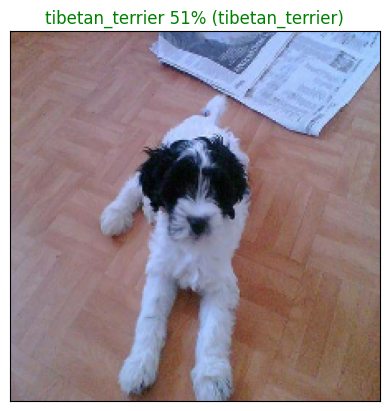

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=101)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

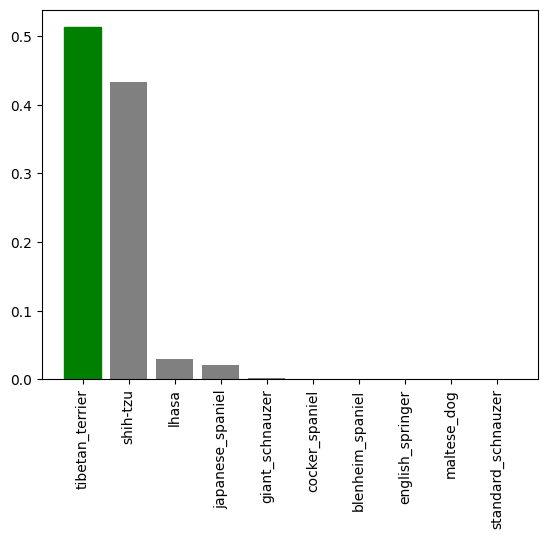

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=101)

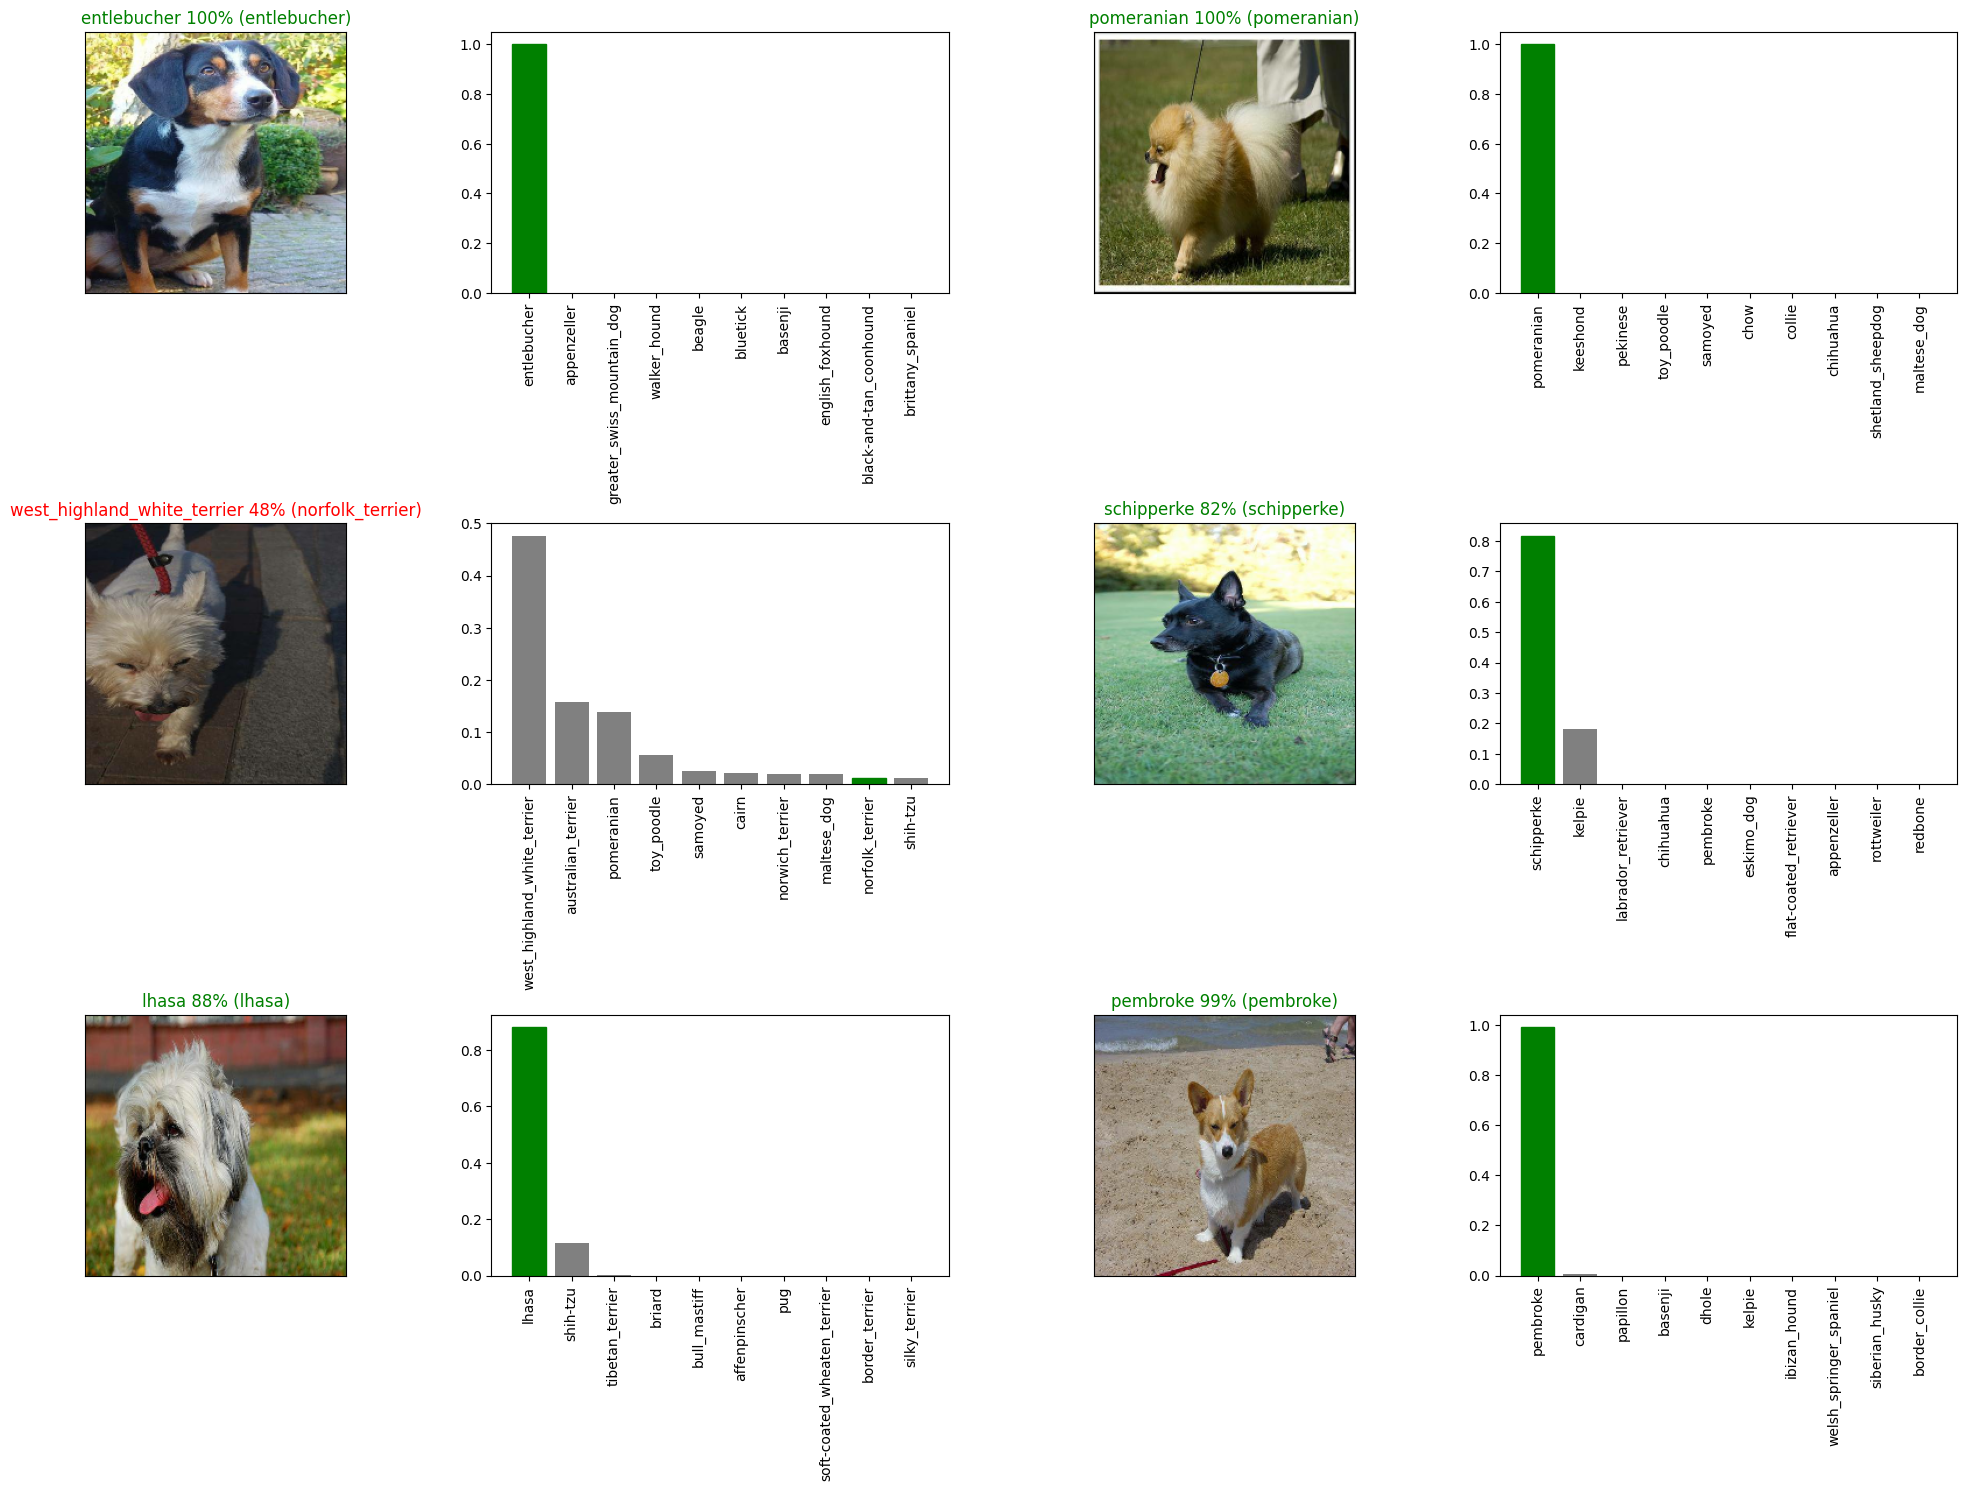

In [ ]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
import datetime
import os

def save_model(model, model_name="0"):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  modeldir = "drive/My Drive/Data/models/"
  model_path = modeldir + model_name + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(new_model, model_name="custom_cnn_v1")

Saving model to: drive/My Drive/Data/models/custom_cnn_v1.h5...


'drive/My Drive/Data/models/custom_cnn_v1.h5'

In [ ]:
mobile_net_v2_final = load_model('drive/My Drive/Data/models/mobile_net_v2_final.h5')

Loading saved model from: drive/My Drive/Data/models/mobile_net_v2_final.h5


In [ ]:
resnet_50_model = load_model('drive/My Drive/Data/models/resnet_50_final.h5')

Loading saved model from: drive/My Drive/Data/models/resnet_50_final.h5


In [ ]:
custom_cnn_v2 = load_model('drive/My Drive/Data/models/custom_cnn_v2.h5')

Loading saved model from: drive/My Drive/Data/models/custom_cnn_v2.h5


OSError: ignored

In [ ]:
mobile_net_v2_final.evaluate(test_data)

63/63 [==============================] - 138s 2s/step - loss: 0.6887 - accuracy: 0.8075 - precision_3: 0.8453 - recall_3: 0.7870


[0.6887439489364624, 0.8075000047683716, 0.845327615737915, 0.7870000004768372]

In [ ]:
resnet_50_model.evaluate(r_test_data)

63/63 [==============================] - 434s 7s/step - loss: 0.1296 - accuracy: 0.9670 - precision_3: 0.9742 - recall_3: 0.9620


[0.12963731586933136,
 0.9670000076293945,
 0.9741772413253784,
 0.9620000123977661]

In [ ]:
image = tf.keras.preprocessing.image.load_img(r_X_test[99], target_size=(IMG_SIZE, IMG_SIZE))
image_array = tf.keras.preprocessing.image.img_to_array(image)

input_tensor = tf.reshape(image_array, [1, IMG_SIZE, IMG_SIZE, 3])

prediction = new_model.predict(input_tensor)

print(prediction)

pred_label = get_pred_label(prediction)
print(pred_label)
Image(r_X_test[99])

1/1 [==============================] - 0s 200ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


NameError: ignored

1/1 [==============================] - 0s 37ms/step
tibetan_terrier


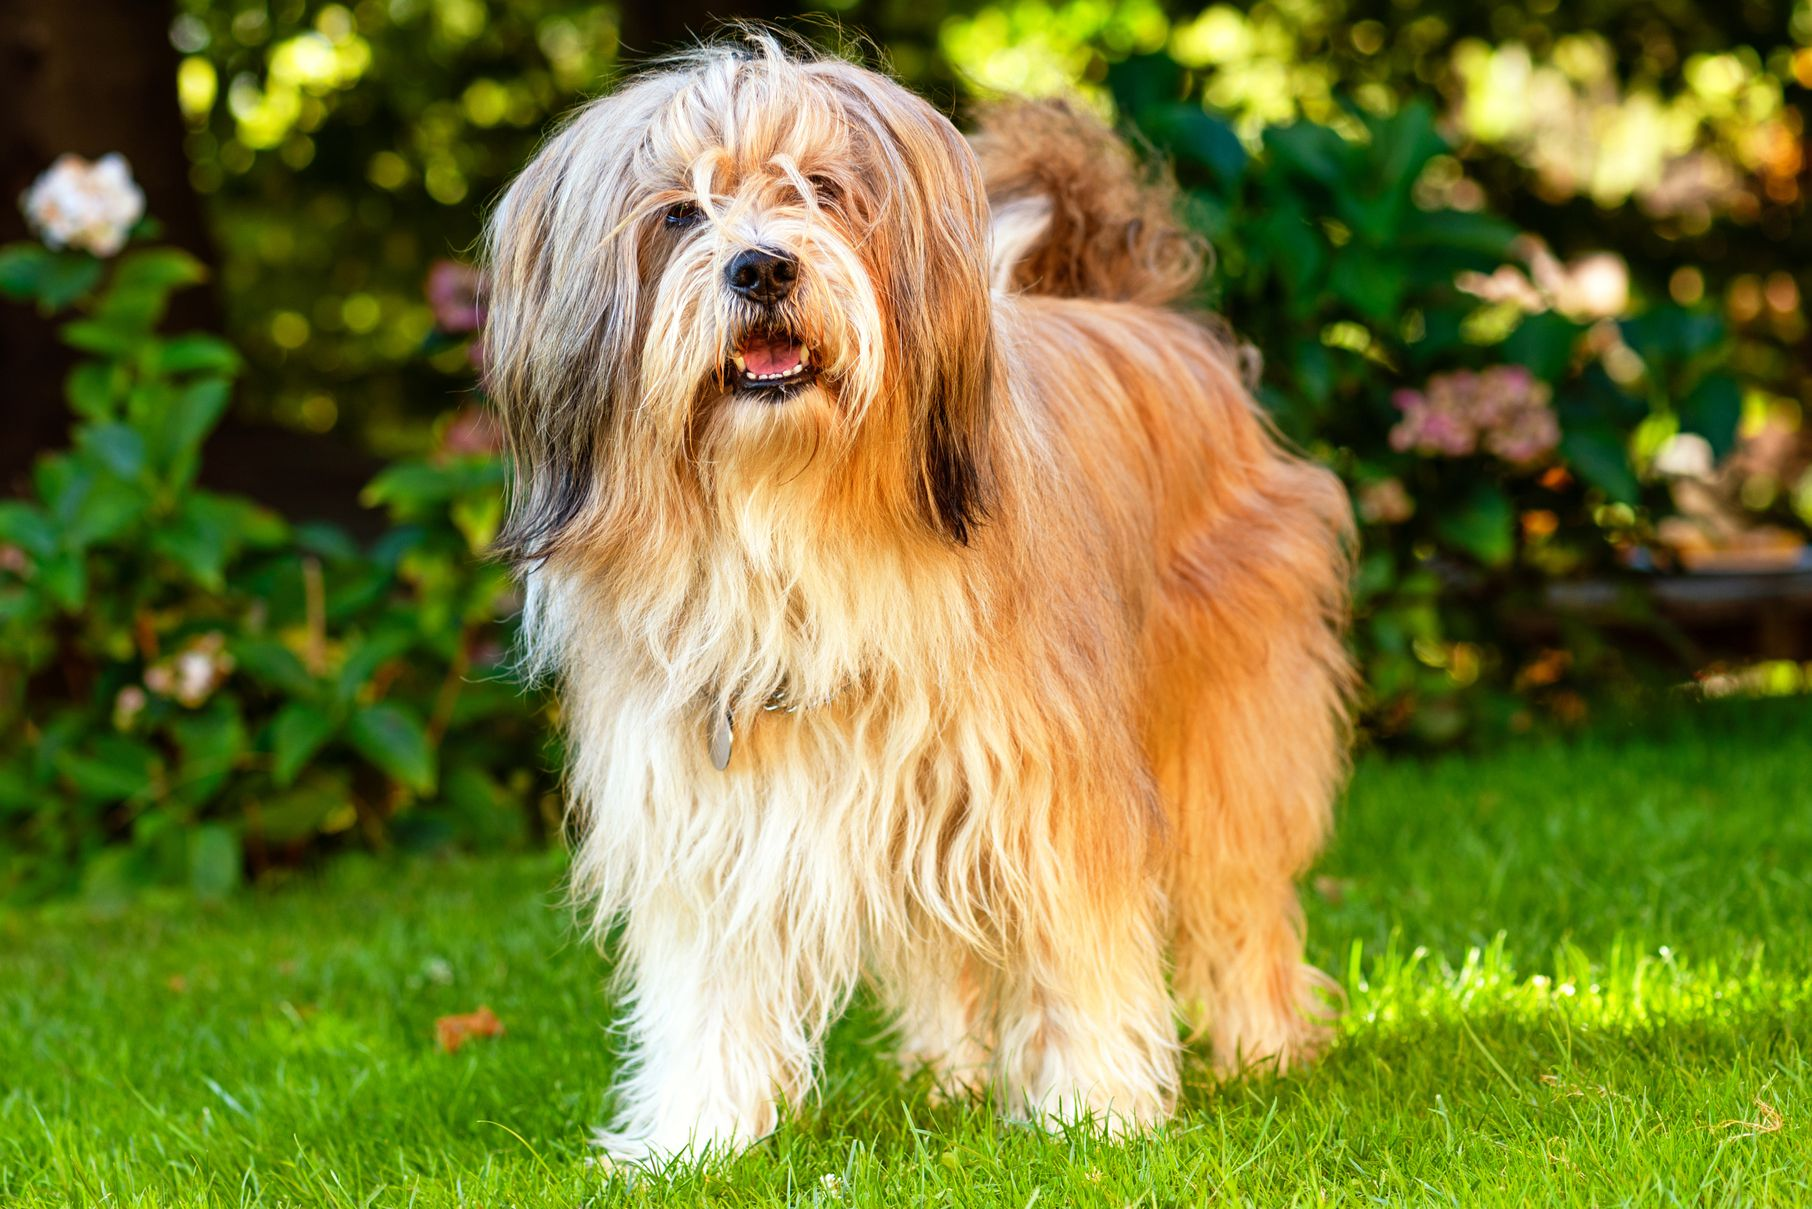

In [ ]:
img = tf.keras.preprocessing.image.load_img("sample_data/img2.jpg", target_size=(IMG_SIZE, IMG_SIZE))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

probs = resnet_50_model.predict(img_array)

pred_label = get_pred_label(probs)
print(pred_label)
Image("sample_data/img2.jpg")

In [ ]:
inception_v3_model.evaluate(r_test_data)

63/63 [==============================] - 138s 2s/step - loss: 5.6444 - accuracy: 0.0070 - precision: 0.0000e+00 - recall: 0.0000e+00


[5.64438533782959, 0.007000000216066837, 0.0, 0.0]

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 28s 77ms/step - loss: 1.3350 - accuracy: 0.6691
Epoch 2/100
320/320 [==============================] - 27s 85ms/step - loss: 0.4060 - accuracy: 0.8783
Epoch 3/100
320/320 [==============================] - 24s 76ms/step - loss: 0.2390 - accuracy: 0.9355
Epoch 4/100
320/320 [==============================] - 24s 76ms/step - loss: 0.1558 - accuracy: 0.9646
Epoch 5/100
320/320 [==============================] - 22s 69ms/step - loss: 0.1070 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 26s 80ms/step - loss: 0.0756 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 22s 67ms/step - loss: 0.0567 - accuracy: 0.9935
Epoch 8/100
320/320 [==============================] - 24s 74ms/step - loss: 0.0457 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 23s 72ms/step - loss: 0.0371 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 22s 70ms/step - l

In [ ]:
save_model(full_model, suffix="1.0.0")

Saving model to: drive/My Drive/Data/models/20230415-09321681551174-1.0.0.h5...


'drive/My Drive/Data/models/20230415-09321681551174-1.0.0.h5'

In [ ]:
model100 = load_model("drive/My Drive/Data/models/20230415-09321681551174-1.0.0.h5")

Loading saved model from: drive/My Drive/Data/models/20230415-09321681551174-1.0.0.h5


In [ ]:
test_path = "Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[0:10]

['Data/test/9a82b96f7fe2263d7174057e519e4c79.jpg',
 'Data/test/bf23f102104e43630fd4aeb576995f2b.jpg',
 'Data/test/3f3910d53f0a1e88dba269a5a7037806.jpg',
 'Data/test/b62ddfd5351da8588789b51fd8536e03.jpg',
 'Data/test/fc05ded9ae428c5b6b2fd8c0e809c1ce.jpg',
 'Data/test/8c61bc9753e79ce7f3a7cfcf33c15dc9.jpg',
 'Data/test/044b55c0f3ddceb089854c891c1fc01b.jpg',
 'Data/test/ac87860f388e2436b85737a1fd5a8ab7.jpg',
 'Data/test/d9e7dbd730e3feaa74e8408e4124aee3.jpg',
 'Data/test/25c0949504ab6e22aae6bdf8ca2ffd4a.jpg']

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

NameError: ignored

In [ ]:
test_predictions = model100.evaluate(test_data,
                                             verbose=1)

324/324 [==============================] - 19s 56ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
train_pred = model100.evaluate(val_data, verbose=1)

7/7 [==============================] - 2s 216ms/step - loss: 0.0047 - accuracy: 1.0000
